In [1]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import quandl
import numpy as np

In [3]:
quandl.ApiConfig.api_key = 'FZCdiqtsRgoffcyx2XqB'

In [4]:
df = quandl.get("XNSE/BIOCON")
print(df.head())

                 Open       High        Low      Close        Volume  \
Date                                                                   
2010-01-01  41.340778  41.340778  41.340778  41.340778  0.000000e+00   
2010-01-04  41.602855  41.992227  41.333290  41.834981  1.831902e+06   
2010-01-05  42.216864  42.419038  41.430633  41.752614  2.912826e+06   
2010-01-06  41.902372  43.699472  41.640295  43.549713  9.987828e+06   
2010-01-07  43.879182  44.328456  43.145366  43.452370  9.700044e+06   

            Adjustment Factor  Adjustment Type  
Date                                            
2010-01-01                NaN              NaN  
2010-01-04                NaN              NaN  
2010-01-05                NaN              NaN  
2010-01-06                NaN              NaN  
2010-01-07                NaN              NaN  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 2010-01-01 to 2018-12-31
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2347 non-null   float64
 1   High               2347 non-null   float64
 2   Low                2347 non-null   float64
 3   Close              2347 non-null   float64
 4   Volume             2347 non-null   float64
 5   Adjustment Factor  11 non-null     float64
 6   Adjustment Type    11 non-null     float64
dtypes: float64(7)
memory usage: 146.7 KB


In [6]:
x = df.drop("Adjustment Factor",axis=1)
y = x.drop("Adjustment Type",axis=1)
print(y)

                  Open        High         Low       Close        Volume
Date                                                                    
2010-01-01   41.340778   41.340778   41.340778   41.340778  0.000000e+00
2010-01-04   41.602855   41.992227   41.333290   41.834981  1.831902e+06
2010-01-05   42.216864   42.419038   41.430633   41.752614  2.912826e+06
2010-01-06   41.902372   43.699472   41.640295   43.549713  9.987828e+06
2010-01-07   43.879182   44.328456   43.145366   43.452370  9.700044e+06
...                ...         ...         ...         ...           ...
2018-12-25  304.794218  304.794218  304.794218  304.794218  0.000000e+00
2018-12-26  304.320122  307.913275  299.928490  306.765462  2.533238e+06
2018-12-27  308.861468  309.909471  304.444884  305.143553  3.031426e+06
2018-12-28  305.792316  311.206999  305.168505  309.809661  2.776504e+06
2018-12-31  311.905668  315.299201  309.410422  313.926816  2.771364e+06

[2347 rows x 5 columns]


In [7]:
y = y[['Close']]
print(y.head())

                Close
Date                 
2010-01-01  41.340778
2010-01-04  41.834981
2010-01-05  41.752614
2010-01-06  43.549713
2010-01-07  43.452370


In [8]:
forecast = 10
y['Prediction'] = y[['Close']].shift(-forecast)

print(y.tail())

                 Close  Prediction
Date                              
2018-12-25  304.794218         NaN
2018-12-26  306.765462         NaN
2018-12-27  305.143553         NaN
2018-12-28  309.809661         NaN
2018-12-31  313.926816         NaN


In [9]:
w = y.drop(['Prediction'],1)
w = w[:-forecast]
print(w)

                 Close
Date                  
2010-01-01   41.340778
2010-01-04   41.834981
2010-01-05   41.752614
2010-01-06   43.549713
2010-01-07   43.452370
...                ...
2018-12-11  314.226246
2018-12-12  318.767592
2018-12-13  320.065120
2018-12-14  323.358844
2018-12-17  316.297299

[2337 rows x 1 columns]


In [10]:
q=y['Prediction']
q=q[:-forecast]
print(q)

Date
2010-01-01     44.732804
2010-01-04     43.811790
2010-01-05     44.028940
2010-01-06     43.781839
2010-01-07     42.156961
                 ...    
2018-12-11    304.794218
2018-12-12    306.765462
2018-12-13    305.143553
2018-12-14    309.809661
2018-12-17    313.926816
Name: Prediction, Length: 2337, dtype: float64


In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(w,q,test_size =0.25)

In [13]:
svr_rbf = SVR(kernel='rbf',C=1e3)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0)

In [14]:
svr_out = svr_rbf.score(x_test,y_test)
print (svr_out)

0.9929617175548695


In [15]:
x_forecast = y.drop(['Prediction'],1)[-forecast:]
print(x_forecast)

                 Close
Date                  
2018-12-18  318.817497
2018-12-19  316.646634
2018-12-20  318.193686
2018-12-21  309.859566
2018-12-24  304.794218
2018-12-25  304.794218
2018-12-26  306.765462
2018-12-27  305.143553
2018-12-28  309.809661
2018-12-31  313.926816


In [16]:
svr_prediction = svr_rbf.predict(x_forecast)
print(svr_prediction)

[313.74366056 313.67200552 313.74067454 312.37224505 310.4081857
 310.4081857  311.26789199 310.56912358 312.35688397 313.34302971]


In [17]:
import matplotlib.pyplot as plt

In [18]:
z = y['2018-11-30':]

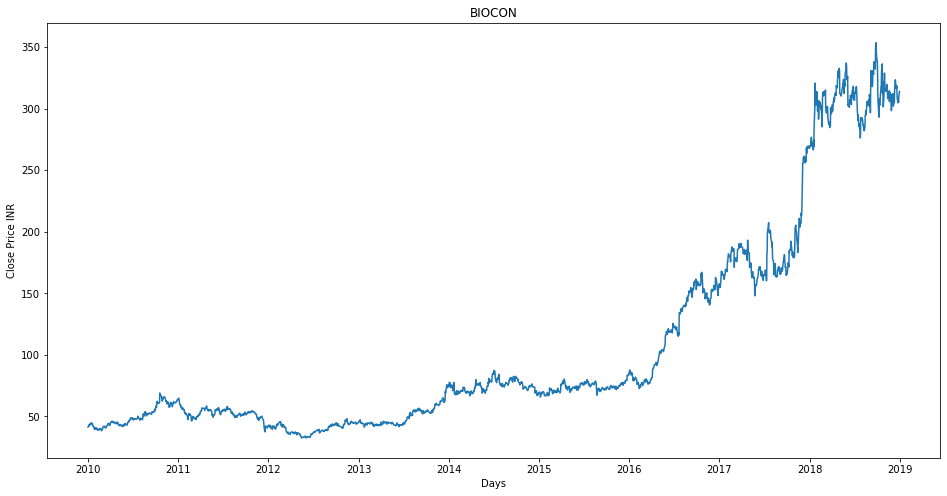

In [19]:
plt.figure(figsize=(16,8))
plt.title('BIOCON')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(y['Close'])
plt.show()

In [20]:
predict = svr_prediction
valid = y[w.shape[0]:]
valid['Predict'] = predict

<ipython-input-20-00284980cf73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predict'] = predict


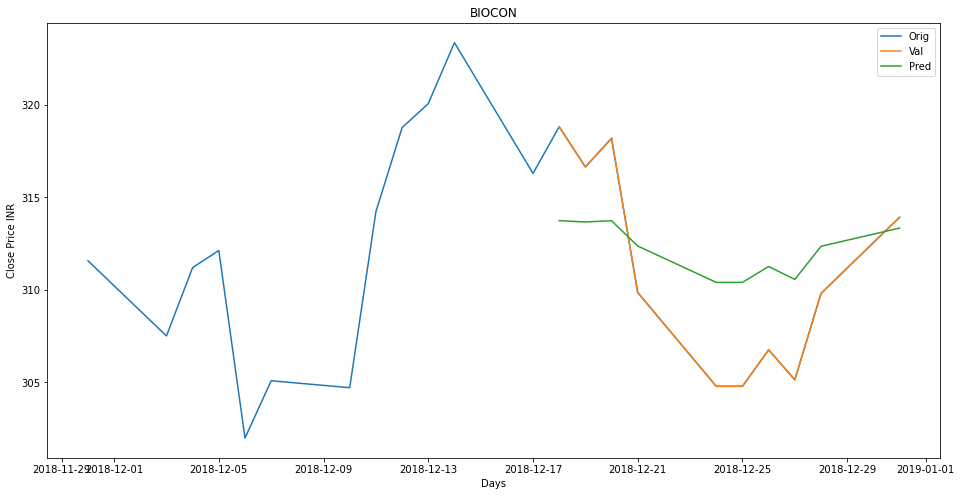

In [21]:
plt.figure(figsize=(16,8))
plt.title('BIOCON')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(z['Close'])
plt.plot(valid[['Close','Predict']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [22]:
import csv

In [24]:
with open('BIOCON.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(map(lambda x: [x],svr_prediction))